## Лабораторная работа №7: Линейная Регрессия

* Выполнил: Русин Ярослав, гр. 6135

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

0.0. Найти и загрузить датасет, подгодящий для регрессии

In [ ]:
import pandas as pd
import numpy as np

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
!unzip  /content/drive/MyDrive/Datasets/machinedata.zip  -d data

Archive:  /content/drive/MyDrive/Datasets/machinedata.zip
  inflating: data/imports-85.txt     
  inflating: data/imports-85_inf.txt  


In [ ]:
machframe = pd.read_csv("/content/data/imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])
machframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
machframe = machframe.drop(machframe[machframe['num-of-doors'] == '?'].index)
machframe = machframe[machframe[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианный
machframe.fillna(machframe.median(),inplace = True)
#проверим бинарный признак
machframe["num-of-doors"].unique() 

array(['two', 'four'], dtype=object)

0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [ ]:
mach = machframe.drop(columns=['symboling','make','body-style','drive-wheels',
                            'fuel-system','engine-type',
                          'fuel-type', 'aspiration', 'num-of-doors','engine-location',
                          'num-of-cylinders'])
mach = mach.astype('float')
mach

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


0.5. Визуализировать heatmap-матрицу кореллированности признаков. См. пример.

In [ ]:
import seaborn as sns

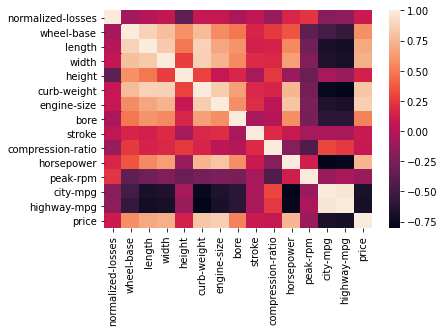

In [ ]:
corr = mach.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

0.6. Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. пример.

In [ ]:
y = mach["horsepower"]
X = mach.drop("horsepower", axis=1)
X.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

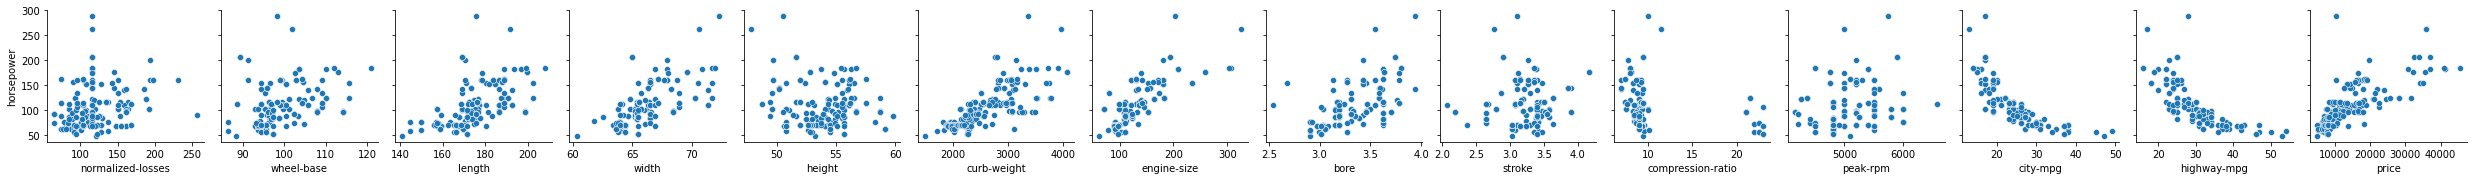

In [ ]:
sns.pairplot(data = mach, y_vars = ['horsepower'], x_vars = X.columns, height=2.5)

0.8. Разделить на обучающую и тестовую выборки

In [ ]:
import sklearn.model_selection

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state = 0)

1.: Опробовать линейную регрессию

1.1 Обучить модель линейной регрессии (LinearRegression)

In [ ]:
import sklearn.linear_model

In [ ]:
model_lr = sklearn.linear_model.LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

1.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
import sklearn.metrics

In [ ]:
sklearn.metrics.mean_absolute_error(y_test, model_lr.predict(X_test))

11.618613124829723

In [ ]:
sklearn.metrics.mean_squared_error(y_test, model_lr.predict(X_test))

215.2338073183605

1.3 Вывести model.coef_ и model.intercept_

In [ ]:
model_lr.coef_

array([-7.53482654e-02, -1.17493377e+00, -6.22400929e-01,  3.34341829e+00,
       -8.61118302e-01,  3.84823123e-02,  4.21291099e-01,  9.97061150e+00,
       -5.87245798e+00, -3.01201124e-01,  1.85435815e-02, -3.76007559e+00,
        2.26418866e+00, -5.03468689e-04])

In [ ]:
model_lr.intercept_

-61.90503576184017

1.4. Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же как мы строили графики для feature_importance в теме с деревьями)
(желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
coefs = []
names = []
z = zip(model_lr.coef_, X.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coefs.append(c)
    names.append(n)

([<matplotlib.axis.YTick at 0x7f8f2fdd4410>,
 [Text(0, 0, 'stroke'),
  Text(0, 0, 'city-mpg'),
  Text(0, 0, 'wheel-base'),
  Text(0, 0, 'height'),
  Text(0, 0, 'length'),
  Text(0, 0, 'compression-ratio'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'price'),
  Text(0, 0, 'peak-rpm'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'engine-size'),
  Text(0, 0, 'highway-mpg'),
  Text(0, 0, 'width'),
  Text(0, 0, 'bore')])

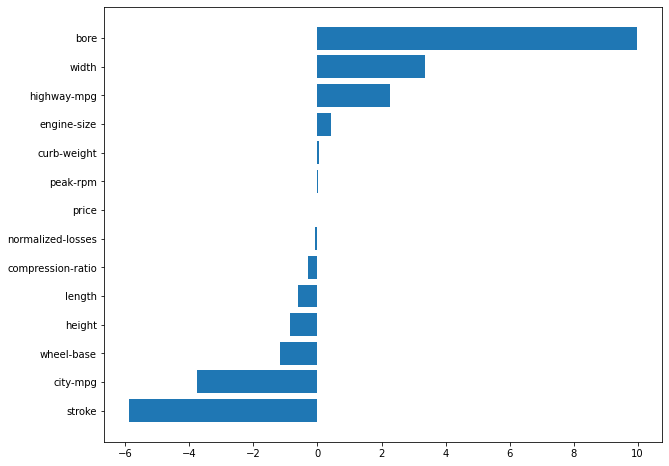

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(range(len(model_lr.coef_)), coefs, align='center')
plt.yticks(range(len(model_lr.coef_)), names)

2. Опробовать регрессию Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()

In [ ]:
parameters = {'alpha': np.linspace(0,1,100)}
lasso_grid = GridSearchCV(lasso,parameters)
lasso_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11270.396197673545, tolerance: 21.046461157024794
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.0...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lasso_grid.best_params_

{'alpha': 0.04040404040404041}

In [ ]:
#сохраним лучший регрессор
lasso = lasso_grid.best_estimator_ 

2.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("MAE: " + str(sklearn.metrics.mean_absolute_error(y_test, lasso.predict(X_test))))
print("MSE: " + str(sklearn.metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print("R2: " + str(sklearn.metrics.r2_score(y_test, lasso.predict(X_test))))

MAE: 11.59794064088225
MSE: 215.9797689236435
R2: 0.8431615371253983


2.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
lasso.coef_

array([-7.53677731e-02, -1.18477459e+00, -6.16382400e-01,  3.31940333e+00,
       -8.51458534e-01,  3.86546669e-02,  4.20671430e-01,  9.10390505e+00,
       -5.52475089e+00, -3.09864891e-01,  1.84539360e-02, -3.73052391e+00,
        2.22565447e+00, -5.01818020e-04])

In [ ]:
lasso.intercept_

-58.561698858121474

2.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [ ]:
coefs_2 = []
names_2 = []
zz = zip(lasso.coef_, X.columns)
zz = sorted(zz, key=lambda x: x[0])
for c, n in zz:
    coefs_2.append(c)
    names_2.append(n)

([<matplotlib.axis.YTick at 0x7f8f2fd7d850>,
 [Text(0, 0, 'stroke'),
  Text(0, 0, 'city-mpg'),
  Text(0, 0, 'wheel-base'),
  Text(0, 0, 'height'),
  Text(0, 0, 'length'),
  Text(0, 0, 'compression-ratio'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'price'),
  Text(0, 0, 'peak-rpm'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'engine-size'),
  Text(0, 0, 'highway-mpg'),
  Text(0, 0, 'width'),
  Text(0, 0, 'bore')])

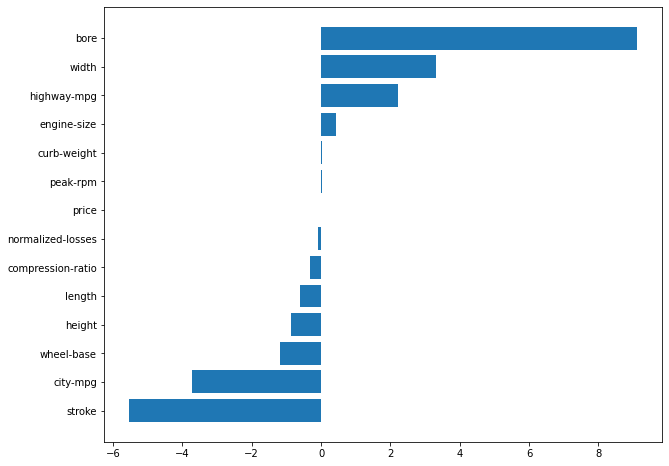

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(range(len(lasso.coef_)), coefs_2, align='center')
plt.yticks(range(len(lasso.coef_)), names_2)

3.: Опробовать регрессию Ridge

3.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
parameters = {'alpha': np.linspace(0,1,100)}
ridge_grid = GridSearchCV(ridge,parameters)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

3.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
ridge = ridge_grid.best_estimator_

In [ ]:
print("MAE: " + str(sklearn.metrics.mean_absolute_error(y_test, ridge.predict(X_test))))
print("MSE: " + str(sklearn.metrics.mean_squared_error(y_test, ridge.predict(X_test))))
print("R2: " + str(sklearn.metrics.r2_score(y_test, ridge.predict(X_test))))

MAE: 11.612956932844755
MSE: 216.84461967302323
R2: 0.8425335067185475


3.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
ridge.coef_

array([-7.59547573e-02, -1.18440032e+00, -6.16299515e-01,  3.34356005e+00,
       -8.62591002e-01,  3.87888663e-02,  4.20297008e-01,  8.64560435e+00,
       -5.62774209e+00, -3.15325823e-01,  1.83958799e-02, -3.74932441e+00,
        2.24253651e+00, -5.04141589e-04])

In [ ]:
ridge.intercept_

-57.633354303327536

3.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [ ]:
coefs_3 = []
names_3 = []
zzz = zip(ridge.coef_, X.columns)
zzz = sorted(zzz, key=lambda x: x[0])
for c, n in zzz:
    coefs_3.append(c)
    names_3.append(n)

([<matplotlib.axis.YTick at 0x7f8f2fb98110>,
 [Text(0, 0, 'stroke'),
  Text(0, 0, 'city-mpg'),
  Text(0, 0, 'wheel-base'),
  Text(0, 0, 'height'),
  Text(0, 0, 'length'),
  Text(0, 0, 'compression-ratio'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'price'),
  Text(0, 0, 'peak-rpm'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'engine-size'),
  Text(0, 0, 'highway-mpg'),
  Text(0, 0, 'width'),
  Text(0, 0, 'bore')])

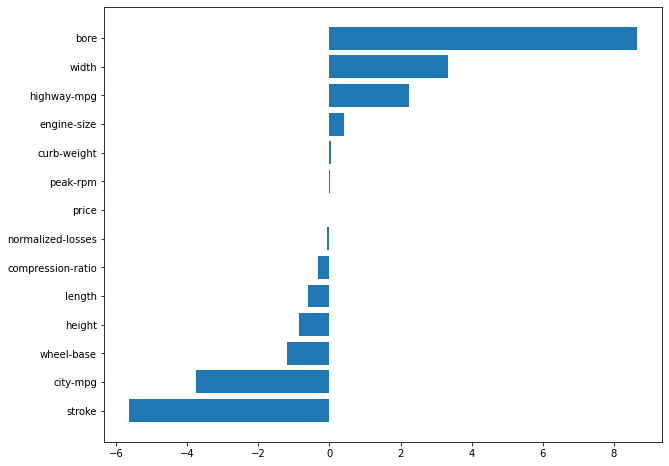

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(range(len(ridge.coef_)), coefs_3, align='center')
plt.yticks(range(len(ridge.coef_)), names_3)

4.: Опробовать регрессию ElasticNet

4.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elnet = ElasticNet()

In [ ]:
parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid = GridSearchCV(elnet,parameters)
elnet_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11270.396197673545, tolerance: 21.046461157024794
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

4.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [ ]:
elnet = elnet_grid.best_estimator_

In [ ]:
print("MAE: " + str(sklearn.metrics.mean_absolute_error(y_test, elnet.predict(X_test))))
print("MSE: " + str(sklearn.metrics.mean_squared_error(y_test, elnet.predict(X_test))))
print("R2: " + str(sklearn.metrics.r2_score(y_test, elnet.predict(X_test))))

MAE: 11.110025380328253
MSE: 224.17448667306763
R2: 0.8372107624675864


4.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [ ]:
elnet.coef_

array([-7.00834079e-02, -1.25461704e+00, -5.02590398e-01,  2.05627028e+00,
       -8.64650587e-01,  4.33861851e-02,  4.11740840e-01,  6.82398523e-01,
       -7.75698216e-01, -5.08622506e-01,  1.80006524e-02, -2.63174972e+00,
        1.19892584e+00, -4.54603465e-04])

In [ ]:
elnet.intercept_

20.957251924762517

4.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [ ]:
coefs_4 = []
names_4 = []
zzzz = zip(elnet.coef_, X.columns)
zzzz = sorted(zzzz, key=lambda x: x[0])
for c, n in zzzz:
    coefs_4.append(c)
    names_4.append(n)

([<matplotlib.axis.YTick at 0x7f8f36809050>,
 [Text(0, 0, 'city-mpg'),
  Text(0, 0, 'wheel-base'),
  Text(0, 0, 'height'),
  Text(0, 0, 'stroke'),
  Text(0, 0, 'compression-ratio'),
  Text(0, 0, 'length'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'price'),
  Text(0, 0, 'peak-rpm'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'engine-size'),
  Text(0, 0, 'bore'),
  Text(0, 0, 'highway-mpg'),
  Text(0, 0, 'width')])

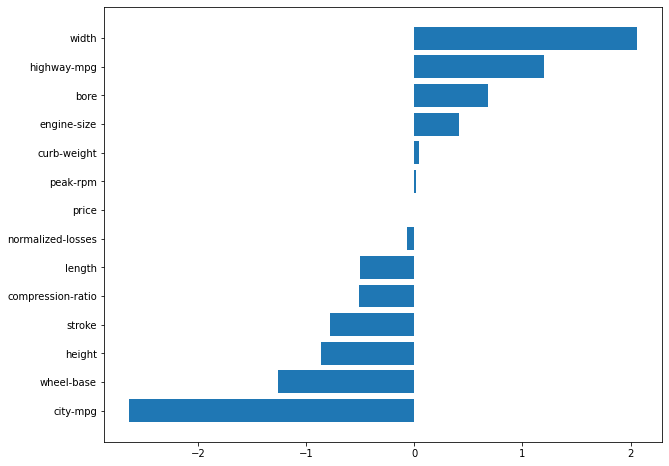

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(range(len(elnet.coef_)), coefs_4, align='center')
plt.yticks(range(len(elnet.coef_)), names_4)

5.0. Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

In [ ]:
print("MAE LR: " + str(sklearn.metrics.mean_absolute_error(y_test, model_lr.predict(X_test))))
print("MAE lasso: " + str(sklearn.metrics.mean_absolute_error(y_test, lasso.predict(X_test))))
print("MAE ridge: " + str(sklearn.metrics.mean_absolute_error(y_test, ridge.predict(X_test))))
print("MAE elastic net: " + str(sklearn.metrics.mean_absolute_error(y_test, elnet.predict(X_test))))

MAE LR: 11.618613124829723
MAE lasso: 11.59794064088225
MAE ridge: 11.612956932844755
MAE elastic net: 11.110025380328253


Elastic Net имеет наименьший МАЕ из предложенных

In [ ]:
print("MAE elastic net: " + str(sklearn.metrics.mean_absolute_error(y_test, elnet.predict(X_test))))
print("MSE elastic net: " + str(sklearn.metrics.mean_squared_error(y_test, elnet.predict(X_test))))
print("R2 elastic net: " + str(sklearn.metrics.r2_score(y_test, elnet.predict(X_test))))

MAE elastic net: 11.110025380328253
MSE elastic net: 224.17448667306763
R2 elastic net: 0.8372107624675864


5.1. Возвращаем категориальные / бинарные признаки обратно в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True )

In [ ]:
mach1 = machframe.drop(columns=['make','body-style','drive-wheels',
                            'fuel-system','engine-type'])

In [ ]:
mach1 = pd.concat([mach1,pd.get_dummies(machframe['make'],drop_first = True)],axis = 1)
mach1 = pd.concat([mach1,pd.get_dummies(machframe['body-style'],drop_first = True)],axis = 1)
mach1 = pd.concat([mach1,pd.get_dummies(machframe['drive-wheels'],drop_first = True)],axis = 1)
mach1 = pd.concat([mach1,pd.get_dummies(machframe['fuel-system'],drop_first = True)],axis = 1)
mach1 = pd.concat([mach1,pd.get_dummies(machframe['engine-type'], drop_first = True)],axis = 1)
mach1

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,115,gas,std,two,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,115,gas,std,two,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,115,gas,std,two,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,164,gas,std,four,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,164,gas,std,four,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,front,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
201,-1,95,gas,turbo,four,front,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
202,-1,95,gas,std,four,front,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
203,-1,95,diesel,turbo,four,front,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
mach1['fuel-type'] = pd.factorize(machframe['fuel-type'])[0]
mach1['aspiration'] = pd.factorize(machframe['aspiration'])[0]
mach1['num-of-doors'] = pd.factorize(machframe['num-of-doors'])[0]
mach1['engine-location'] = pd.factorize(machframe['engine-location'])[0]
mach1['num-of-cylinders'] = pd.factorize(machframe['num-of-cylinders'])[0]
mach1

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,115,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,130,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,115,0,0,0,0,94.5,171.2,65.5,52.4,2823,1,152,2.68,3.47,9.0,154,5000,19,26,16500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,164,0,0,1,0,99.8,176.6,66.2,54.3,2337,0,109,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,164,0,0,1,0,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,2952,0,141,3.78,3.15,9.5,114,5400,23,28,16845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
201,-1,95,0,1,1,0,109.1,188.8,68.8,55.5,3049,0,141,3.78,3.15,8.7,160,5300,19,25,19045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
202,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,3012,1,173,3.58,2.87,8.8,134,5500,18,23,21485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
203,-1,95,1,1,1,0,109.1,188.8,68.9,55.5,3217,1,145,3.01,3.40,23.0,106,4800,26,27,22470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


5.2. Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [ ]:
y1 = mach1["horsepower"]
X1 = mach1.drop("horsepower", axis=1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(X1, y1, random_state = 0)

In [ ]:
elnet1 = ElasticNet()
parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid1 = GridSearchCV(elnet1,parameters)
elnet_grid1.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1489.4864149002774, tolerance: 21.046461157024794
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [ ]:
elnet1 = elnet_grid1.best_estimator_

In [ ]:
print("MAE: " + str(sklearn.metrics.mean_absolute_error(y_test1, elnet1.predict(X_test1))))
print("MSE: " + str(sklearn.metrics.mean_squared_error(y_test1, elnet1.predict(X_test1))))
print("R2: " + str(sklearn.metrics.r2_score(y_test1, elnet1.predict(X_test1))))

MAE: 6.462764660895067
MSE: 80.24133527927476
R2: 0.9417309882915181


5.3. Прогоняем наш датасет (X), который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data_tr = mach1.drop("horsepower",axis = 1)
target = mach1["horsepower"]

In [ ]:
scaler.fit(data_tr) #нормируем данные
tdtr = scaler.transform(data_tr)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(tdtr, target, random_state = 0)

In [ ]:
elnet2 = ElasticNet()
parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid2 = GridSearchCV(elnet2,parameters)
elnet_grid2.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1489.4864149002867, tolerance: 21.046461157024794
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [ ]:
elnet2 = elnet_grid2.best_estimator_

In [ ]:
print("MAE: " + str(sklearn.metrics.mean_absolute_error(y_test2, elnet2.predict(X_test2))))
print("MSE: " + str(sklearn.metrics.mean_squared_error(y_test2, elnet2.predict(X_test2))))
print("R2: " + str(sklearn.metrics.r2_score(y_test2, elnet2.predict(X_test2))))

MAE: 6.129618626389239
MSE: 83.52732859865593
R2: 0.9393447919186062


5.4. Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [ ]:
coefs_5 = []
names_5 = []
zzzzz = zip(elnet2.coef_, data_tr.columns)
zzzzz = sorted(zzzzz, key=lambda x: x[0])
for c, n in zzzzz:
    coefs_5.append(c)
    names_5.append(n)

([<matplotlib.axis.YTick at 0x7f8f2e55a7d0>,
 [Text(0, 0, 'city-mpg'),
  Text(0, 0, 'mercedes-benz'),
  Text(0, 0, 'wheel-base'),
  Text(0, 0, 'idi'),
  Text(0, 0, 'fuel-type'),
  Text(0, 0, 'num-of-doors'),
  Text(0, 0, 'peugot'),
  Text(0, 0, 'ohc'),
  Text(0, 0, 'symboling'),
  Text(0, 0, 'l'),
  Text(0, 0, 'jaguar'),
  Text(0, 0, '4bbl'),
  Text(0, 0, 'height'),
  Text(0, 0, 'volvo'),
  Text(0, 0, 'renault'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'spdi'),
  Text(0, 0, 'bore'),
  Text(0, 0, 'plymouth'),
  Text(0, 0, 'dodge'),
  Text(0, 0, 'subaru'),
  Text(0, 0, 'isuzu'),
  Text(0, 0, 'volkswagen'),
  Text(0, 0, 'length'),
  Text(0, 0, 'num-of-cylinders'),
  Text(0, 0, 'compression-ratio'),
  Text(0, 0, 'honda'),
  Text(0, 0, 'mitsubishi'),
  Text(0, 0, 'spfi'),
  Text(0, 0, 'ohcf'),
  Text(0, 0, 'stroke'),
  Text(0, 0, 'mfi'),
  Text(0, 0, 'mazda'),
  Text(0, 0, 'hardtop'),
  Text(0, 0, '2bbl'),
  Text(0, 0, 'bmw'),
  Text(0, 0, 'chevrolet'),
  Text(0, 0, 'ohcv'),
  Text(

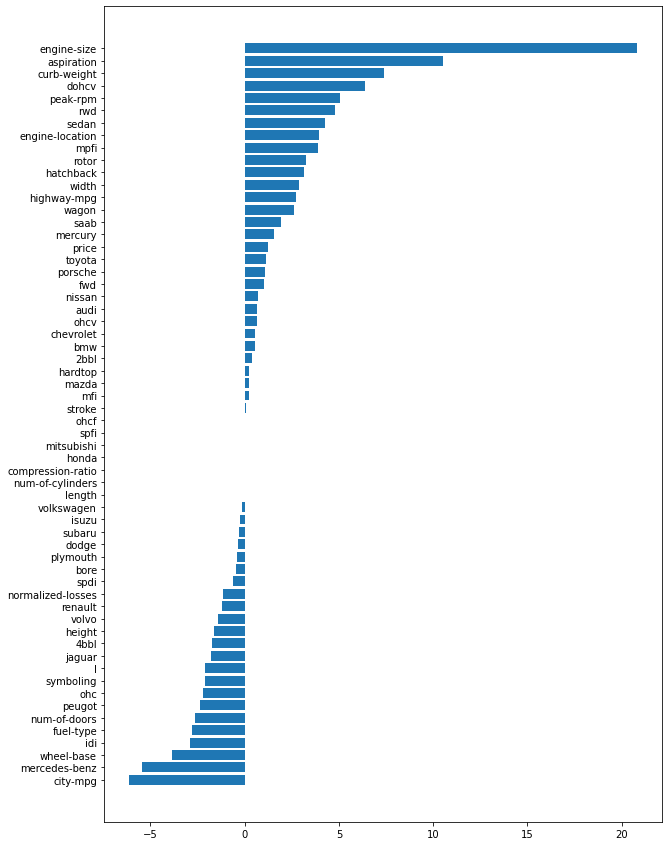

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(range(len(elnet2.coef_)), coefs_5, align='center')
plt.yticks(range(len(elnet2.coef_)), names_5)

In [ ]:
print("MAE LR: " + str(sklearn.metrics.mean_absolute_error(y_test, model_lr.predict(X_test))))
print("MAE lasso: " + str(sklearn.metrics.mean_absolute_error(y_test, lasso.predict(X_test))))
print("MAE ridge: " + str(sklearn.metrics.mean_absolute_error(y_test, ridge.predict(X_test))))
print("MAE elastic net: " + str(sklearn.metrics.mean_absolute_error(y_test, elnet.predict(X_test))))
print("MAE elastic net with all features: " + str(sklearn.metrics.mean_absolute_error(y_test2, elnet1.predict(X_test1))))
print("MAE elastic net with normalize: " + str(sklearn.metrics.mean_absolute_error(y_test2, elnet2.predict(X_test2))))

MAE LR: 11.618613124829723
MAE lasso: 11.59794064088225
MAE ridge: 11.612956932844755
MAE elastic net: 11.110025380328253
MAE elastic net with all features: 6.462764660895067
MAE elastic net with normalize: 6.129618626389239


Наилучшим регрессором оказался elastic net с нормализацией признаков